In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Calculate Res-Permeability using data : well test analysis**

**pwf = pi - m[log(t) + c]**

This equation comes from unsteady flow of compressible fluid.

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Divyanshu-ISM/Petroleum-DS-ML-with-Python/main/Pt.csv')

In [ ]:
df.head()

,time,pressure
0,0.0010,2743.96
1,0.0021,2737.52
2,0.0034,2730.16
3,0.0048,2722.32
4,0.0064,2713.83


**A. Cartesian Analysis :Tells what kind of test is it.**

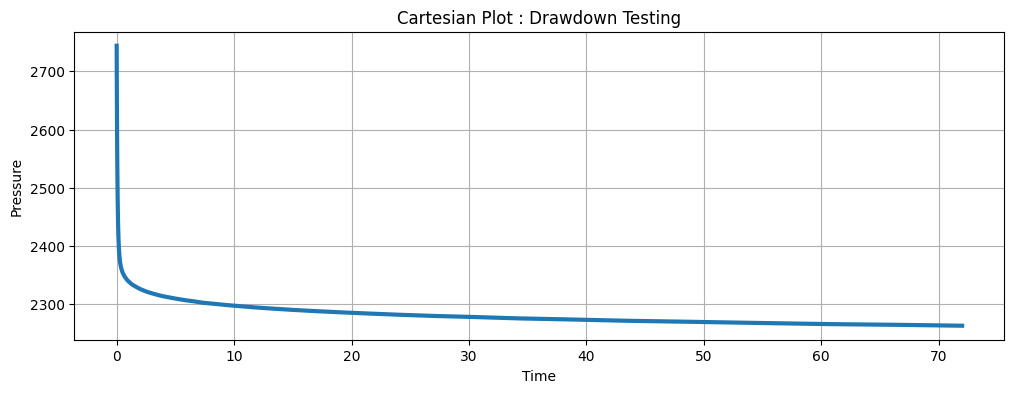

In [ ]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.plot(df['time'], df['pressure'],lw=3)

plt.xlabel('Time') ; plt.ylabel('Pressure')

plt.title('Cartesian Plot : Drawdown Testing')
plt.grid()

**B.Semilog Analysis : High level searching for MTR**

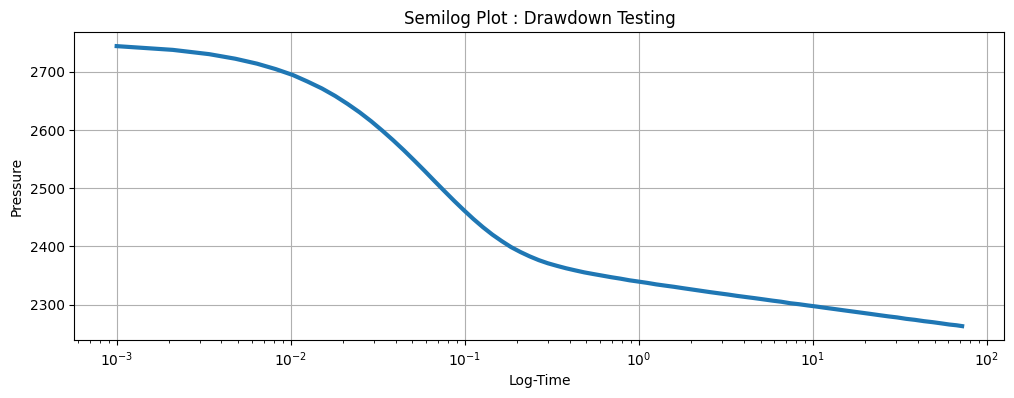

In [ ]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.semilogx(df['time'], df['pressure'],lw=3)

plt.xlabel('Log-Time') ; plt.ylabel('Pressure')

plt.title('Semilog Plot : Drawdown Testing')
plt.grid()

**C. Log-Log Plot : Computations**

In [ ]:
Pi = 2760 #psi Given

df['delP'] = np.abs(Pi - df['pressure'])

#note that np.diff(P) does what we call as 'dP' in 'dP/dt'. 
#But it reduces one element.
df['d(delP)'] = np.zeros(len(df))
df['d(delP)'].iloc[1:] = np.abs(np.diff(df['delP']))


df['dt'] = np.zeros(len(df))
df['dt'].iloc[1:] = np.diff(df['time'])


#P' (Pdash) = t*dP/dt
df['Pdash'] = np.zeros(len(df))
df['Pdash'].iloc[0:] = df['time']*df['d(delP)']/df['dt']






df.head()

,time,pressure,delP,d(delP),dt,Pdash
0,0.0010,2743.96,16.04,0.00,0.0000,NaN
1,0.0021,2737.52,22.48,6.44,0.0011,12.294545
2,0.0034,2730.16,29.84,7.36,0.0013,19.249231
3,0.0048,2722.32,37.68,7.84,0.0014,26.880000
4,0.0064,2713.83,46.17,8.49,0.0016,33.960000


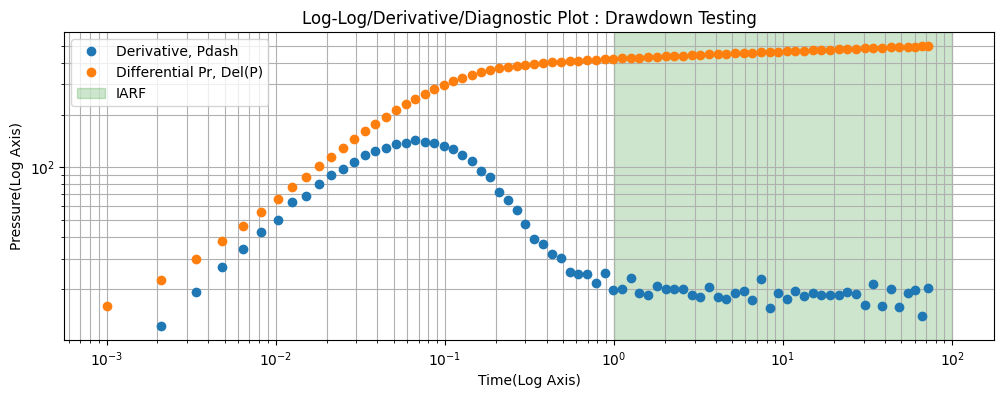

In [ ]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.loglog(df['time'], df['Pdash'],'o',label='Derivative, Pdash')
plt.loglog(df['time'], df['delP'],'o',label='Differential Pr, Del(P)')

plt.axvspan(1,100,color='green',alpha=0.2,label='IARF')

plt.xlabel('Time(Log Axis)') ; plt.ylabel('Pressure(Log Axis)')

plt.title('Log-Log/Derivative/Diagnostic Plot : Drawdown Testing')


plt.legend()
plt.grid(True, which="both")

In [ ]:
df[df['time']>1]['pressure'].mean()

2298.766756756757

In [ ]:
tmin_iarf = 1 #hr
tmax_iarf = 50 #hrs

**D.semilog Plot For IARF MTR only**

In [ ]:
df_semilog = df[(df['time']>=tmin_iarf) & (df['time'] <= tmax_iarf)]

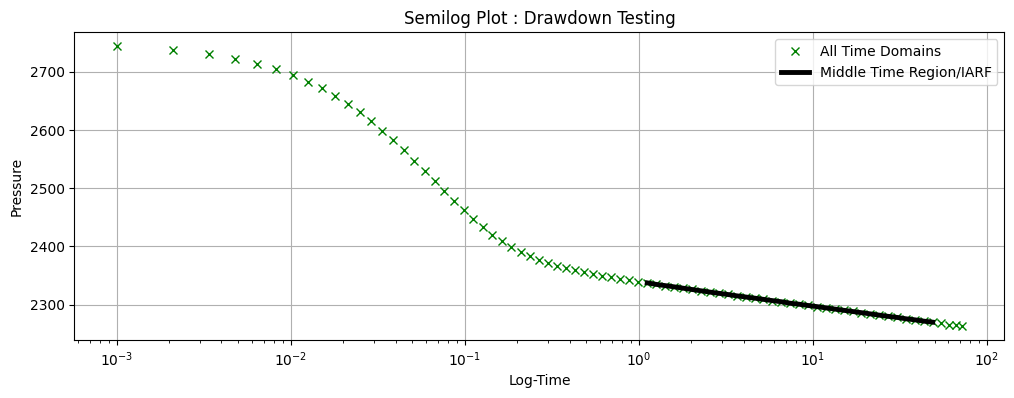

In [ ]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.semilogx(df['time'], df['pressure'],'x',color='green',label='All Time Domains')
plt.semilogx(df_semilog['time'], df_semilog['pressure'],color='black',lw=3.5,label='Middle Time Region/IARF')

plt.xlabel('Log-Time') ; plt.ylabel('Pressure')

plt.title('Semilog Plot : Drawdown Testing')

plt.legend()
plt.grid()

**Conclusion : Finding Permeability**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


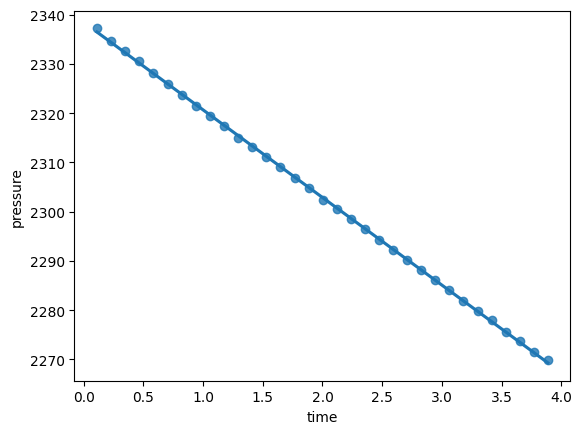

In [ ]:
t = np.log(df_semilog['time'])
P = df_semilog['pressure']


sns.regplot(t,P)

In [ ]:
#Polyfit
np.polyfit(t,P,1)

array([ -17.7869321 , 2338.42912687])

In [ ]:
[slope,intercept]=np.polyfit(t,P,1)
abs(slope)

17.786932104989376

In [ ]:
m = abs(slope)

**m = (162.6) * (quB/kh)**

In [ ]:
q = 125 #stb/d
mu = 2.1 #cp
B = 1.14 #rb/Stb
h = 50 #ft

k = 162.6*q*mu/m/h

print(f'Formation Permeability is : {np.round(k,2)} miliDarcies')

Formation Permeability is : 47.99 miliDarcies


**Finding skin factor**

In [ ]:
p1hr=954
pi=1154
m=-22
k=89
fi=0.2
mu=3.93
ct=8.74*(10**-6)
rw=0.25

In [ ]:
s=1.51*(((p1hr-pi)/m)-np.log10(k/(fi*mu*ct*(rw**2)))+3.23)
s

6.04654295122592

In [ ]:
(p1hr-pi)/m

9.090909090909092

In [ ]:
np.log10(k/(fi*mu*ct*(rw**2)))

8.316576010627026

In [ ]:
(p1hr-pi)/m + 3.23 -8.3

4.020909090909091